/tmp/ipython-input-3467354318.py:70: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.pause(0.8)
/tmp/ipython-input-3467354318.py:70: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.pause(0.8)


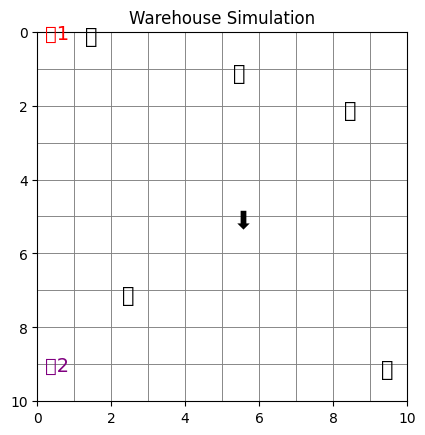

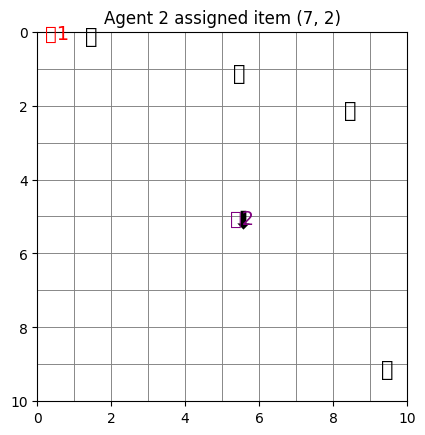

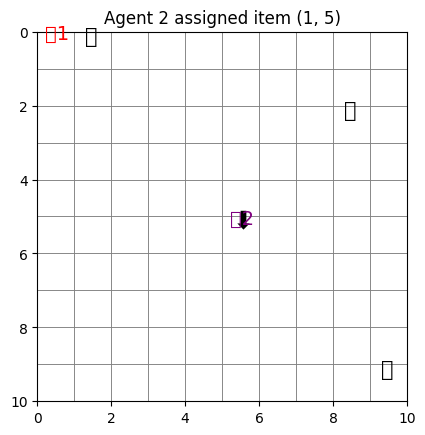

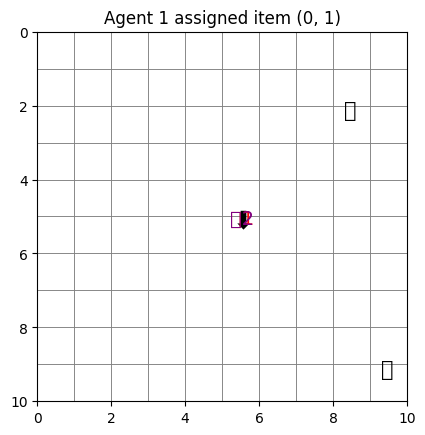

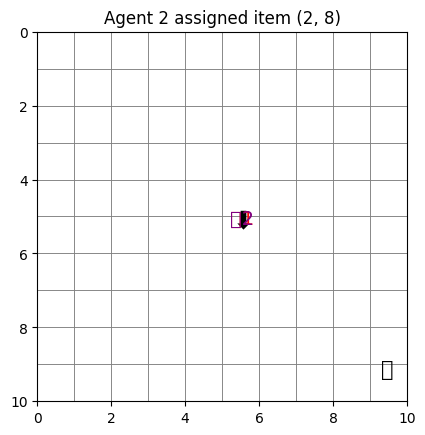

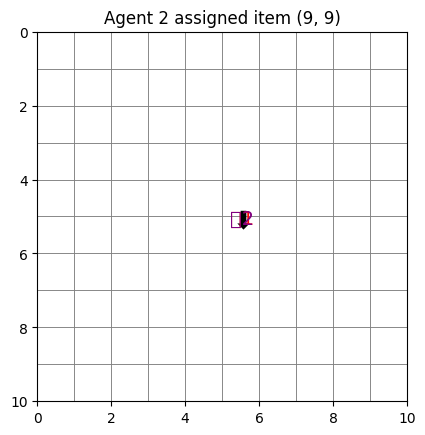


TASK ASSIGNMENTS:
Item (r,c)	Assigned Agent	Task Distance
(7, 2)		2		9
(1, 5)		2		8
(0, 1)		1		10
(2, 8)		2		12
(9, 9)		2		16

AGENT SUMMARY:
Agent	Tasks	Total Distance
1	1	10
2	4	45

OVERALL METRICS:
Total items:        5
Total distance:     55
Total time (steps): 45
Efficiency (items/distance): 0.091


In [ ]:
import math
import matplotlib.pyplot as plt
import time

ROWS = 10
COLS = 10

# Positions of items in the warehouse
ITEM_POSITIONS = [(0, 1), (2, 8), (7, 2), (9, 9), (1, 5)]
DROP_ZONE = (5, 5)

START_AGENT1 = (0, 0)
START_AGENT2 = (9, 0)


def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


class Agent:
    def __init__(self, agent_id, start_pos):
        self.id = agent_id
        self.pos = start_pos
        self.total_distance = 0
        self.tasks_completed = 0

    def assign_task(self, item_pos, drop_zone):
        """Compute cost for this task, update stats."""
        d = manhattan(self.pos, item_pos) + manhattan(item_pos, drop_zone)
        self.total_distance += d
        self.tasks_completed += 1
        self.pos = drop_zone
        return d


# ------------------------------
# VISUALIZATION
# ------------------------------
def draw_grid(agent1, agent2, remaining_items, picked_item=None):
    plt.clf()

    # Draw grid
    for r in range(ROWS):
        for c in range(COLS):
            plt.plot([c, c+1], [r, r], color='gray', linewidth=0.5)
            plt.plot([c, c+1], [r+1, r+1], color='gray', linewidth=0.5)
            plt.plot([c, c], [r, r+1], color='gray', linewidth=0.5)
            plt.plot([c+1, c+1], [r, r+1], color='gray', linewidth=0.5)

    # Items (blue)
    for (r, c) in remaining_items:
        plt.text(c+0.3, r+0.3, "📦", fontsize=15)

    # Drop zone (green)
    dz = DROP_ZONE
    plt.text(dz[1]+0.3, dz[0]+0.3, "⬇️", fontsize=18)

    # Agents (red & purple)
    plt.text(agent1.pos[1]+0.2, agent1.pos[0]+0.2, "🤖1", color='red', fontsize=14)
    plt.text(agent2.pos[1]+0.2, agent2.pos[0]+0.2, "🤖2", color='purple', fontsize=14)

    if picked_item:
        plt.title(f"Agent {picked_item[1]} assigned item {picked_item[0]}")
    else:
        plt.title("Warehouse Simulation")

    plt.xlim(0, COLS)
    plt.ylim(ROWS, 0)
    plt.gca().set_aspect("equal")
    plt.pause(0.8)


# ------------------------------
# SIMULATION + VISUALIZATION
# ------------------------------
def run_warehouse_simulation():
    items = list(ITEM_POSITIONS)
    agent1 = Agent(1, START_AGENT1)
    agent2 = Agent(2, START_AGENT2)

    assignments = []

    plt.ion()
    draw_grid(agent1, agent2, items)

    while items:
        best_item = None
        best_agent = None
        best_cost = math.inf

        for item in items:
            cost1 = manhattan(agent1.pos, item) + manhattan(item, DROP_ZONE)
            cost2 = manhattan(agent2.pos, item) + manhattan(item, DROP_ZONE)

            chosen_cost = cost1 if cost1 < cost2 else cost2
            chosen_agent = agent1 if cost1 < cost2 else agent2

            if chosen_cost < best_cost:
                best_cost = chosen_cost
                best_item = item
                best_agent = chosen_agent

        # Assign task
        task_cost = best_agent.assign_task(best_item, DROP_ZONE)
        assignments.append((best_item, best_agent.id, task_cost))
        items.remove(best_item)

        draw_grid(agent1, agent2, items, picked_item=(best_item, best_agent.id))

    plt.ioff()
    plt.show()

    # ---- TEXT OUTPUT ----
    print("\nTASK ASSIGNMENTS:")
    print("Item (r,c)\tAssigned Agent\tTask Distance")
    for item_pos, agent_id, cost in assignments:
        print(f"{item_pos}\t\t{agent_id}\t\t{cost}")

    print("\nAGENT SUMMARY:")
    print("Agent\tTasks\tTotal Distance")
    print(f"{agent1.id}\t{agent1.tasks_completed}\t{agent1.total_distance}")
    print(f"{agent2.id}\t{agent2.tasks_completed}\t{agent2.total_distance}")

    total_items = len(ITEM_POSITIONS)
    total_distance = agent1.total_distance + agent2.total_distance
    total_time = max(agent1.total_distance, agent2.total_distance)
    efficiency = total_items / total_distance if total_distance > 0 else 0

    print("\nOVERALL METRICS:")
    print(f"Total items:        {total_items}")
    print(f"Total distance:     {total_distance}")
    print(f"Total time (steps): {total_time}")
    print(f"Efficiency (items/distance): {efficiency:.3f}")


if __name__ == "__main__":
    run_warehouse_simulation()